In [1]:
import nest
import numpy
import pylab

nest.ResetKernel()

In [2]:
nest.SetKernelStatus({"overwrite_files": True,
                      "data_path": "/data",
                      "data_prefix": ""})

In [3]:
print("iaf_cond_alpha recordables: {0}".format(
      nest.GetDefaults("iaf_cond_alpha")["recordables"]))

iaf_cond_alpha recordables: (<SLILiteral: g_ex>, <SLILiteral: g_in>, <SLILiteral: t_ref_remaining>, <SLILiteral: V_m>)


In [4]:
n = nest.Create("iaf_cond_alpha",
                params={"tau_syn_ex": 1.0, "V_reset": -70.0})

m = nest.Create("multimeter",
                params={"interval": 0.1,
                        "record_from": ["V_m", "g_ex", "g_in"],
                        "withgid": True,
                        "to_file": True,
                        "label": "my_multimeter"})

s_ex = nest.Create("spike_generator",
                   params={"spike_times": numpy.array([10.0, 20.0, 50.0])})
s_in = nest.Create("spike_generator",
                   params={"spike_times": numpy.array([15.0, 25.0, 55.0])})

In [5]:
nest.Connect(s_ex, n, syn_spec={"weight": 40.0})
nest.Connect(s_in, n, syn_spec={"weight": -20.0})
nest.Connect(m, n)

In [6]:
nest.Simulate(100.)

In [7]:
events = nest.GetStatus(m)[0]["events"]
t = events["times"]

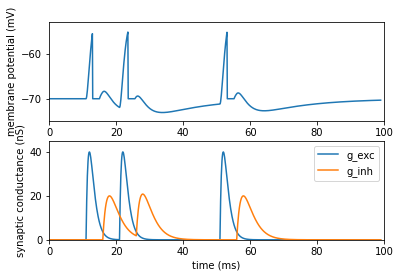

In [8]:
pylab.clf()

pylab.subplot(211)
pylab.plot(t, events["V_m"])
pylab.axis([0, 100, -75, -53])
pylab.ylabel("membrane potential (mV)")

pylab.subplot(212)
pylab.plot(t, events["g_ex"], t, events["g_in"])
pylab.axis([0, 100, 0, 45])
pylab.xlabel("time (ms)")
pylab.ylabel("synaptic conductance (nS)")
pylab.legend(("g_exc", "g_inh"))